# Project: Investigating the NICS system to determine wheather a prospective buyer is eligible to buy firearms or explosives.


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> The NICS is used by to determine whether a prospective buyer is eligible to buy firearms or explosives. Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. The data has been supplemented with state level data. The columns used in the dataset are: month, state, permit, permit_recheck, handgun,	long_gun, other, multiple, admin, prepawn_handgun, prepawn_long_gun, prepawn_other, redemption_handgun, redemption_long_gun, redemption_other, returned_handgun, returned_long_gun, returned_other, rentals_handgun, rentals_long_gun, private_sale_handgun, private_sale_long_gun, private_sale_other, return_to_seller_handgun, return_to_seller_long_gun	return_to_seller_other, totals



### Questions for my Analysis include:
> What is the total number of persons with permit? What is the total number of persons without permit? How many persons without permit returned the firearms and explosives?


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
### Data Wrangling

#### In this section of the report, I will clean my dataset to enable me use them for my analysis.
#### After importing the neccessary libraries, I will do the following:
##### •	Read my dataset
##### • Shape my dataset
##### •	Describe my dataset
##### •	Drop off data from the given dataset that would not be used for my analysis
##### •	Get information about my data after drop off
##### •	Define the various data that I would use in my analysis from my dataset
##### •	Find the mean value of the data that would be used


In [3]:
#Dataset is in read for analysis.
#The result below shows that my dataset is made up 5rows and 27columns 

NICS_data = pd.read_csv('NICS.csv')
NICS_data.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2022-04,Alabama,16150.0,236.0,20593.0,12513.0,1249.0,1041,0.0,21.0,...,0.0,0.0,0.0,16.0,19.0,4.0,0.0,1.0,0.0,54956
1,2022-04,Alaska,354.0,19.0,3425.0,2946.0,391.0,192,0.0,2.0,...,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,7589
2,2022-04,Arizona,25746.0,1305.0,20628.0,9300.0,1814.0,1253,0.0,7.0,...,0.0,0.0,0.0,16.0,10.0,0.0,0.0,0.0,0.0,61899
3,2022-04,Arkansas,2043.0,364.0,7659.0,5376.0,483.0,390,4.0,3.0,...,0.0,0.0,0.0,12.0,7.0,2.0,0.0,0.0,0.0,18222
4,2022-04,California,17944.0,12972.0,38217.0,25572.0,5595.0,5,1.0,1.0,...,158.0,0.0,0.0,7491.0,3186.0,698.0,23.0,7.0,0.0,116208


In [98]:
##The shape of my dataset is (15510cells, 27columns)

NICS_data.shape

(15510, 27)

In [75]:
##This section describes the [Total Count; mean; standard dev; min val; \n
##percentages of persons with permit asper the various types of guns being investigated and the max val]

NICS_data.describe()

,permit,permit_recheck,handgun,long_gun,other,returned_handgun,returned_long_gun,returned_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,15486.000000,4.125000e+03,15490.000000,15491.000000,8525.000000,5225.000000,5170.000000,4840.000000,5500.000000,5775.000000,5280.000000,1.551000e+04
mean,7477.605579,9.441435e+03,7382.750161,8024.963979,588.898534,69.771675,16.243327,3.432025,1.058182,0.975065,0.131061,2.700583e+04
std,26831.029024,6.031967e+04,10914.017822,9190.871934,1383.784381,171.325516,57.162335,22.652690,5.038520,4.012848,0.523244,4.988908e+04
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000e+00,1077.000000,2201.500000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.174250e+03
50%,881.000000,0.000000e+00,3647.500000,5331.000000,194.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.370900e+04
75%,5843.750000,1.160000e+02,8924.750000,10872.000000,627.000000,55.000000,12.000000,1.000000,0.000000,1.000000,0.000000,3.015050e+04
max,522188.000000,1.350676e+06,147714.000000,108058.000000,77929.000000,2185.000000,1309.000000,592.000000,70.000000,62.000000,18.000000,1.427917e+06


In [69]:
##After the dataset has been described, the result is provided bbelow

NICS_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15510 entries, 0 to 15509
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      15510 non-null  object 
 1   state                      15510 non-null  object 
 2   permit                     15486 non-null  float64
 3   permit_recheck             4125 non-null   float64
 4   handgun                    15490 non-null  float64
 5   long_gun                   15491 non-null  float64
 6   other                      8525 non-null   float64
 7   multiple                   15510 non-null  int64  
 8   admin                      15487 non-null  float64
 9   prepawn_handgun            13567 non-null  float64
 10  prepawn_long_gun           13565 non-null  float64
 11  prepawn_other              8140 non-null   float64
 12  redemption_handgun         13570 non-null  float64
 13  redemption_long_gun        13569 non-null  flo

In [5]:
##Here, I drop-off the data that would not be sampled in my analysis 

NICS_data.drop(['admin', 'prepawn_handgun', 'prepawn_long_gun', 'prepawn_other', 'redemption_handgun', 'month', 
                'multiple', 'redemption_long_gun', 'redemption_other', 'private_sale_long_gun', 'private_sale_handgun', 
                'private_sale_other', 'rentals_handgun', 'rentals_long_gun', 'state'], axis = 1, inplace = True)

In [72]:
##After dropping off the unrequired data, the result is as below:

NICS_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15510 entries, 0 to 15509
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   permit                     15486 non-null  float64
 1   permit_recheck             4125 non-null   float64
 2   handgun                    15490 non-null  float64
 3   long_gun                   15491 non-null  float64
 4   other                      8525 non-null   float64
 5   returned_handgun           5225 non-null   float64
 6   returned_long_gun          5170 non-null   float64
 7   returned_other             4840 non-null   float64
 8   return_to_seller_handgun   5500 non-null   float64
 9   return_to_seller_long_gun  5775 non-null   float64
 10  return_to_seller_other     5280 non-null   float64
 11  totals                     15510 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 1.4 MB


In [4]:
##Below, I Defined all the data I would be analysing in the investigation

mean = NICS_data.mean == True
permit = NICS_data.permit == True
Unpermit = NICS_data.permit == False
handgun = NICS_data.handgun == True
long_gun = NICS_data.long_gun == True
other = NICS_data.other == True
return_to_seller_handgun = NICS_data.return_to_seller_handgun == True
not_return_to_seller_handgun =NICS_data.return_to_seller_handgun == False
return_to_seller_long_gun = NICS_data.return_to_seller_long_gun == True
not_return_to_seller_long_gun =NICS_data.return_to_seller_long_gun == False
return_to_seller_other = NICS_data.return_to_seller_other == True
not_return_to_seller_other =NICS_data.return_to_seller_other == False            

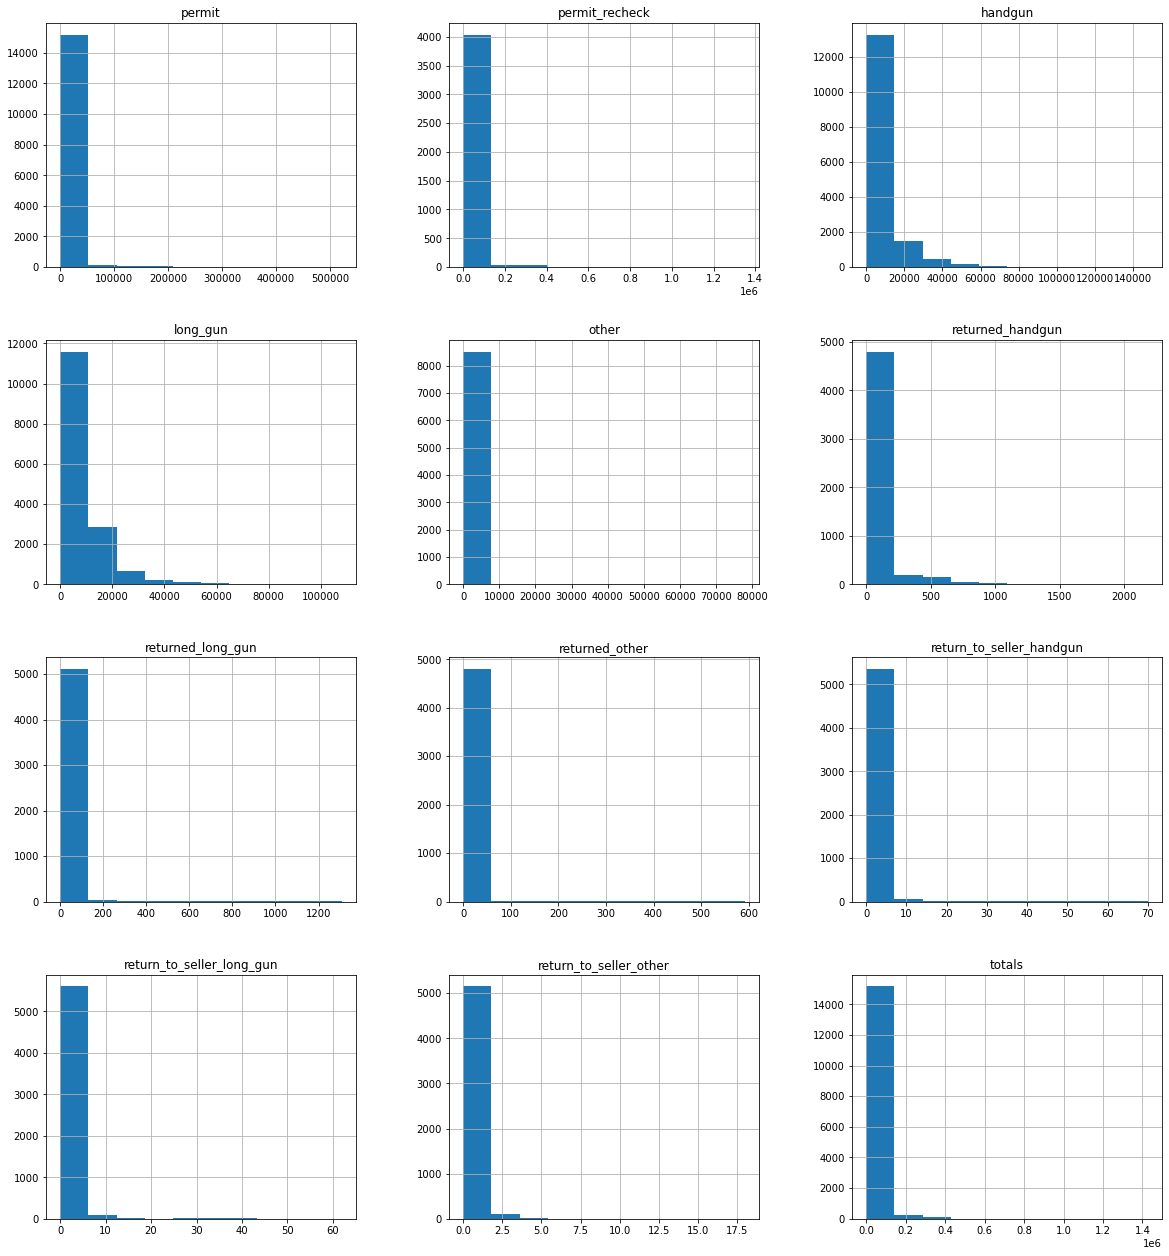

In [73]:
##A histogram is plotted to depict a pictorial representation of the used dataset

NICS_data.hist(figsize=(20, 22));

### This section of the data exploration calculates the mean value of the following classes of data set:

##### • Number of users with Permit
##### • Number of users who returned to seller Hand gun
##### • Number of users who returned to seller Long gun
##### • Number of users who returned to seller other categories of gun

In [33]:
##The mean of the total number of users with permit is gotten

NICS_data.totals[permit].mean()

16658.048387096773

In [34]:
##The mean of the total number of users who returned hand gun to seller is derived 

NICS_data.totals[return_to_seller_handgun].mean()

48639.577996715925

In [37]:
##The average of the total number of long gun retruned to seller is worked out

NICS_data.totals[return_to_seller_long_gun].mean()

44278.35704125178

In [67]:
##The average of other types of gun returned to the seller is provided. 

NICS_data.totals[return_to_seller_other].mean()

60973.988764044945

In [105]:
##A function display the output of a given computation

NICS_data.totals[permit].mean()
    
if mean >= 16658:
        
    print("permit")
    
else: 
    
    print("Unpermit")
        
    
if mean >= 48639:
    
    print("return_to_seller_handgun")
    
else: 
    
    print("not_return_to_seller_handgun")    
    
if mean>= 44278:
    
    print("return_to_seller_long_gun")
    
else:
    
    print("not_return_to_seller_long_gun")

if mean >= 60973:
    
    print("return_to_seller_other")
    
else: 
        
    print("not_return_to_seller_other")

Unpermit
not_return_to_seller_handgun
not_return_to_seller_long_gun
not_return_to_seller_other


### Data exploration continues with visualizations of the following:
##### • A scatter plot depicting the number of handgun and long_gun returned and not returned to seller
##### • Histogram charts showing the following:
         > Number of persons with and without permit to purchase a gun
         > Number of handgun returned and not returned to seller
         > Number of long_gun returned and not returned to seller
         > Number of other categories of gun returned and not returned to seller
##### • Barcharts depictings the following:
         > Grouping by handgun
         > Grouping by long_gun
         > Grouping by other
##### • Each chart include attributes as: Title, axis and labels

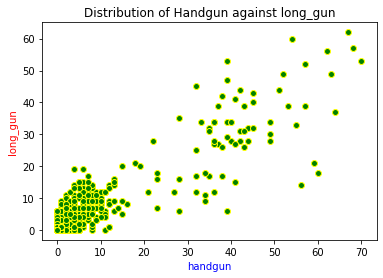

In [53]:
##A scatter plot showing the distribution of handgun returned and not returned to seller on the X-axis and
##Long_gun returned and not returned to seller on the Y-axis

x = NICS_data.return_to_seller_handgun, not_return_to_seller_handgun
y = NICS_data.return_to_seller_long_gun, not_return_to_seller_long_gun

plt.title('Distribution of Handgun against long_gun');
plt.xlabel('handgun', color='blue');
plt.ylabel('long_gun', color='red');
plt.plot(x, y, 'o', color='red', markerfacecolor='green', markeredgecolor='yellow');
plt.figsize=(9, 8);

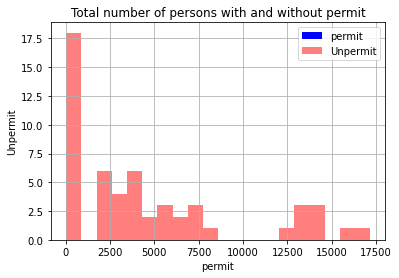

In [19]:
##An histogram showing the distribution of persons with permit or not

NICS_data.head(500).totals[permit].hist(alpha=1.0, color='blue', bins=20, label='permit')
NICS_data.head(500).totals[Unpermit].hist(alpha=0.5, color='red', bins=20, label='Unpermit')
plt.legend();
plt.title('Total number of persons with and without permit');
plt.xlabel('permit');
plt.ylabel('Unpermit');
plt.figsize=(9, 8);

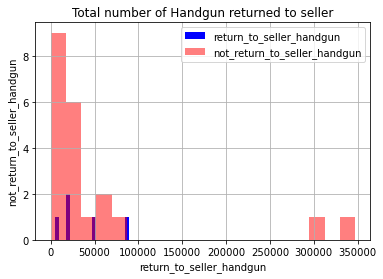

In [18]:
##An histogram showing the distribution of handgun

NICS_data.head(30).totals[return_to_seller_handgun].hist(alpha=1.0, color='blue', bins=20, label='return_to_seller_handgun')
NICS_data.head(30).totals[not_return_to_seller_handgun].hist(alpha=0.5, color='red', bins=20, label='not_return_to_seller_handgun')
plt.legend();
plt.title('Total number of Handgun returned to seller');
plt.xlabel('return_to_seller_handgun');
plt.ylabel('not_return_to_seller_handgun');
plt.figsize=(9, 8);

In [10]:
def Bar_plot(arg1, arg2, arg3):
    NICS_data.head(10).groupby(arg1).permit.mean().plot(kind='bar', figsize=(7, 6), alpha=1.0, color=arg2)
    plt.title(arg3);

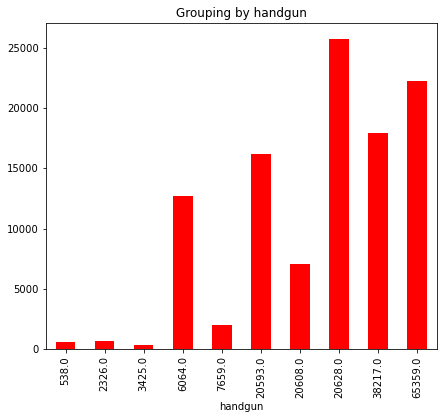

In [11]:
Bar_plot('handgun', 'red', 'Grouping by handgun')

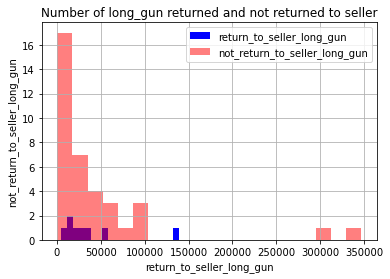

In [5]:
##An histogram showing the distribution of long_gun

NICS_data.head(50).totals[return_to_seller_long_gun].hist(alpha=1.0, color='blue', bins=20, label='return_to_seller_long_gun')
NICS_data.head(50).totals[not_return_to_seller_long_gun].hist(alpha=0.5, color='red', bins=20, label='not_return_to_seller_long_gun')
plt.legend();
plt.title('Number of long_gun returned and not returned to seller');
plt.xlabel('return_to_seller_long_gun');
plt.ylabel('not_return_to_seller_long_gun');

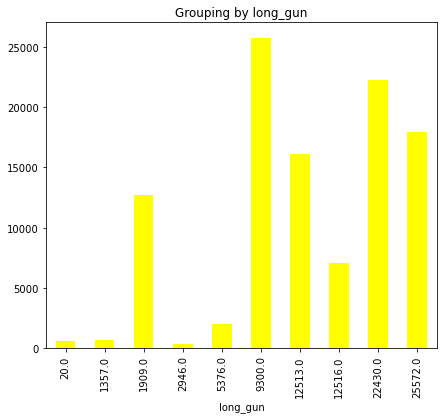

In [20]:
Bar_plot('long_gun', 'yellow', 'Grouping by long_gun')

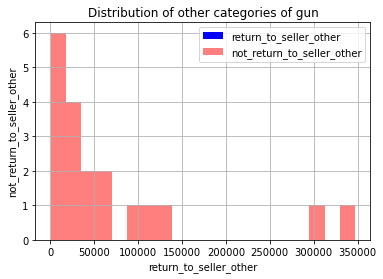

In [94]:
##An histogram showing the distribution of other categories of gun

NICS_data.head(20).totals[return_to_seller_other].hist(alpha=1.0, color='blue', bins=20, label='return_to_seller_other')
NICS_data.head(20).totals[not_return_to_seller_other].hist(alpha=0.5, color='red', bins=20, label='not_return_to_seller_other')
plt.legend();
plt.title('Distribution of other categories of gun');
plt.xlabel('return_to_seller_other');
plt.ylabel('not_return_to_seller_other');

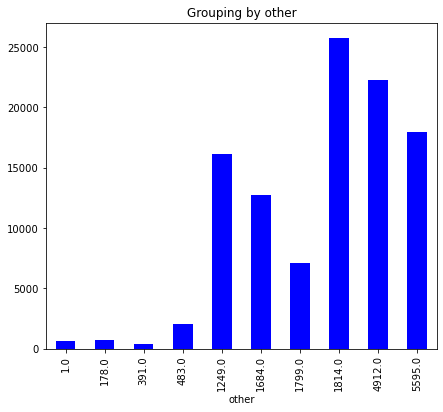

In [21]:
Bar_plot('other', 'blue', 'Grouping by other')

### CONCLUSION

We have come to the end of our analysis, with results and limitations shown below:

### Result: From the analysis, our data suggest that
  ######  1. There are more persons who got permit to purchase a gun compared to those that didn’t have
  ######  2. We were able to figure the number of handgun, long_gun, and other guns returned due to lack of permit
### Limitations: The limitations observed with the analysis are
  ###### 1. Since not all firearms were purchased from one source, the expected return especially to the private sectors might not be accurate.

In [2]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1